In [72]:
install.packages("arulesViz")

also installing the dependencies 'permute', 'zoo', 'tweenr', 'ca', 'gclus', 'qap', 'registry', 'TSP', 'vegan', 'lmtest', 'ggforce', 'tidygraph', 'graphlayouts', 'data.table', 'seriation', 'vcd', 'igraph', 'ggraph', 'plotly', 'visNetwork'


Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.4/seriation_1.5.5.tgz': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  no fue posible abrir la URL 'https://cran.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.4/seriation_1.5.5.tgz'


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'seriation' failed"



The downloaded binary packages are in
	/var/folders/bj/lgd1pp8n2jl_c63chxnrqg340000gp/T//Rtmpvv29bg/downloaded_packages


In [73]:
# Cargar la librería necesaria
library(readr)
library(arules)
library(arulesCBA)
library (arulesViz)

In [59]:
df <- read_delim("./XDiscretizado.csv")

# Convertir las columnas a factores
df <- as.data.frame(lapply(df, as.factor))

Rows: 768 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (8): X1, X2, X3, X4, X5, X6, X7, X8

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [62]:
min_support <- 0.05
min_conf    <- 0.50

# Convertir el data frame a transacciones
trans <- as(df, "transactions")

# Aplicar el algoritmo Apriori para encontrar reglas de asociación
rules <- apriori( 
            trans, 
            parameter = list( support = min_support, conf = min_conf, minlen = 2, maxlen = 7 ),
        )

# Mostrar las reglas encontradas
inspect(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target  ext
      7  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 38 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[51 item(s), 768 transaction(s)] done [0.00s].
sorting and recoding items ... [51 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [855 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
      lhs               rhs              support confidence   coverage      lift count
[1]   {X7=GA0.0}     => {X8=GAD0}     0.06250000  1.0000000 0.06250000 16.000000    48
[2]   {X8=GAD0}      => {X7=GA0.0}    0.06250000  1.0000000 0.06250000 16.000000    48
[3]   {X2=SA661.5}   => {

In [63]:
# Reglas duplicadas
duplicated( rules )

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

In [64]:
# Reglas redundantes
redundant <- is.redundant( rules )
redundant
which( is.redundant( rules ) )

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[217]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[253]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[289] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[313]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[337]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
[349]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[361]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[373]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
[397]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[409]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[421]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[433] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[457]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[469]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[481]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[493] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[553]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[577]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[589]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[601]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[613]  TRUE  TRUE  TRUE 

[1] 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 [19] 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 [37] 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 [55] 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 248
 [73] 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 [91] 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
[109] 285 287 288 290 291 292 293 295 296 298 299 300 301 302 303 304 305 306
[127] 307 308 309 310 312 313 315 316 317 318 320 321 323 324 325 326 327 328
[145] 329 330 331 332 333 334 335 337 338 340 341 342 343 345 346 348 349 350
[163] 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
[181] 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
[199] 387 388 389 390 392 393 395 396 397 398 399 400 401 402 403 404 406 407
[217] 409 410 412 413 414 415 416 417 418 419 420 421 422 423 424 426 427 429
[235] 430 431 432 434 435 437 438 439 440 442 443 444 445 446 447 448 449 450
[253] 451 452 454 455 457 458 459 460 462 463 465 466 467 468 469 470 471 472
[271] 473 474 475 476 477 479 480 481 482 483 485 486 488 489 490 491 492 494
[289] 495 497 498 499 500 502 503 504 505 506 507 508 509 510 511 512 513 514
[307] 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532
[325] 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550
[343] 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568
[361] 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586
[379] 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604
[397] 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622
[415] 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640
[433] 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658
[451] 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676
[469] 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694
[487] 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712
[505] 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730
[523] 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748
[541] 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766
[559] 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784
[577] 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801 802
[595] 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820
[613] 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838
[631] 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855

In [65]:
# Utilizar solo reglas no redundantes
rules <- rules[!redundant]
inspect( rules )

      lhs                         rhs           support    confidence
[1]   {X7=GA0.0}               => {X8=GAD0}     0.06250000 1.0000000 
[2]   {X8=GAD0}                => {X7=GA0.0}    0.06250000 1.0000000 
[3]   {X2=SA661.5}             => {X3=WA416.5}  0.08333333 1.0000000 
[4]   {X3=WA416.5}             => {X2=SA661.5}  0.08333333 1.0000000 
[5]   {X2=SA661.5}             => {X1=RC0.76}   0.08333333 1.0000000 
[6]   {X1=RC0.76}              => {X2=SA661.5}  0.08333333 1.0000000 
[7]   {X2=SA661.5}             => {X4=RA122.5}  0.08333333 1.0000000 
[8]   {X4=RA122.5}             => {X2=SA661.5}  0.08333333 0.5000000 
[9]   {X2=SA661.5}             => {X5=OH7.0}    0.08333333 1.0000000 
[10]  {X3=WA416.5}             => {X1=RC0.76}   0.08333333 1.0000000 
[11]  {X1=RC0.76}              => {X3=WA416.5}  0.08333333 1.0000000 
[12]  {X3=WA416.5}             => {X4=RA122.5}  0.08333333 1.0000000 
[13]  {X4=RA122.5}             => {X3=WA416.5}  0.08333333 0.5000000 
[14]  {X3=WA416.5}  

In [66]:
# Resumen de apriori en crudo
summary( rules )

set of 208 rules

rule length distribution (lhs + rhs):sizes
  2   3 
175  33 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.159   2.000   3.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.06250   Min.   :0.5000   Min.   :0.06250   Min.   : 1.00  
 1st Qu.:0.08333   1st Qu.:0.5000   1st Qu.:0.08333   1st Qu.: 2.00  
 Median :0.08333   Median :1.0000   Median :0.08333   Median : 4.00  
 Mean   :0.09625   Mean   :0.8502   Mean   :0.12861   Mean   : 5.83  
 3rd Qu.:0.08333   3rd Qu.:1.0000   3rd Qu.:0.16667   3rd Qu.:12.00  
 Max.   :0.50000   Max.   :1.0000   Max.   :0.50000   Max.   :16.00  
     count       
 Min.   : 48.00  
 1st Qu.: 64.00  
 Median : 64.00  
 Mean   : 73.92  
 3rd Qu.: 64.00  
 Max.   :384.00  

mining info:
  data ntransactions support confidence
 trans           768    0.05        0.5
                                                                                  

In [67]:
inspect(head(rules, n = 10, by ="confidence"))

     lhs             rhs          support    confidence coverage   lift count
[1]  {X7=GA0.0}   => {X8=GAD0}    0.06250000 1          0.06250000 16   48   
[2]  {X8=GAD0}    => {X7=GA0.0}   0.06250000 1          0.06250000 16   48   
[3]  {X2=SA661.5} => {X3=WA416.5} 0.08333333 1          0.08333333 12   64   
[4]  {X3=WA416.5} => {X2=SA661.5} 0.08333333 1          0.08333333 12   64   
[5]  {X2=SA661.5} => {X1=RC0.76}  0.08333333 1          0.08333333 12   64   
[6]  {X1=RC0.76}  => {X2=SA661.5} 0.08333333 1          0.08333333 12   64   
[7]  {X2=SA661.5} => {X4=RA122.5} 0.08333333 1          0.08333333  6   64   
[8]  {X2=SA661.5} => {X5=OH7.0}   0.08333333 1          0.08333333  2   64   
[9]  {X3=WA416.5} => {X1=RC0.76}  0.08333333 1          0.08333333 12   64   
[10] {X1=RC0.76}  => {X3=WA416.5} 0.08333333 1          0.08333333 12   64   


In [68]:
inspect(head(rules, n=10, by="support"))

     lhs             rhs          support   confidence coverage  lift     count
[1]  {X5=OH3.5}   => {X4=RA220.5} 0.5000000 1.0000000  0.5000000 2.000000 384  
[2]  {X4=RA220.5} => {X5=OH3.5}   0.5000000 1.0000000  0.5000000 2.000000 384  
[3]  {X4=RA147.0} => {X5=OH7.0}   0.2500000 1.0000000  0.2500000 2.000000 192  
[4]  {X5=OH7.0}   => {X4=RA147.0} 0.2500000 0.5000000  0.5000000 2.000000 192  
[5]  {X4=RA122.5} => {X5=OH7.0}   0.1666667 1.0000000  0.1666667 2.000000 128  
[6]  {X3=WA294.0} => {X5=OH7.0}   0.1666667 0.6666667  0.2500000 1.333333 128  
[7]  {X3=WA318.5} => {X5=OH7.0}   0.1666667 0.6666667  0.2500000 1.333333 128  
[8]  {X7=GA0.1}   => {X5=OH7.0}   0.1562500 0.5000000  0.3125000 1.000000 120  
[9]  {X7=GA0.1}   => {X5=OH3.5}   0.1562500 0.5000000  0.3125000 1.000000 120  
[10] {X7=GA0.1}   => {X4=RA220.5} 0.1562500 0.5000000  0.3125000 1.000000 120  


In [69]:
inspect(head( rules, n = 46, by ="lift" ))

     lhs              rhs           support    confidence coverage   lift count
[1]  {X7=GA0.0}    => {X8=GAD0}     0.06250000 1          0.06250000 16   48   
[2]  {X8=GAD0}     => {X7=GA0.0}    0.06250000 1          0.06250000 16   48   
[3]  {X2=SA661.5}  => {X3=WA416.5}  0.08333333 1          0.08333333 12   64   
[4]  {X3=WA416.5}  => {X2=SA661.5}  0.08333333 1          0.08333333 12   64   
[5]  {X2=SA661.5}  => {X1=RC0.76}   0.08333333 1          0.08333333 12   64   
[6]  {X1=RC0.76}   => {X2=SA661.5}  0.08333333 1          0.08333333 12   64   
[7]  {X3=WA416.5}  => {X1=RC0.76}   0.08333333 1          0.08333333 12   64   
[8]  {X1=RC0.76}   => {X3=WA416.5}  0.08333333 1          0.08333333 12   64   
[9]  {X1=RC0.74}   => {X2=SA686.0}  0.08333333 1          0.08333333 12   64   
[10] {X2=SA686.0}  => {X1=RC0.74}   0.08333333 1          0.08333333 12   64   
[11] {X1=RC0.74}   => {X3=WA245.0}  0.08333333 1          0.08333333 12   64   
[12] {X3=WA245.0}  => {X1=RC0.74}   0.08

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



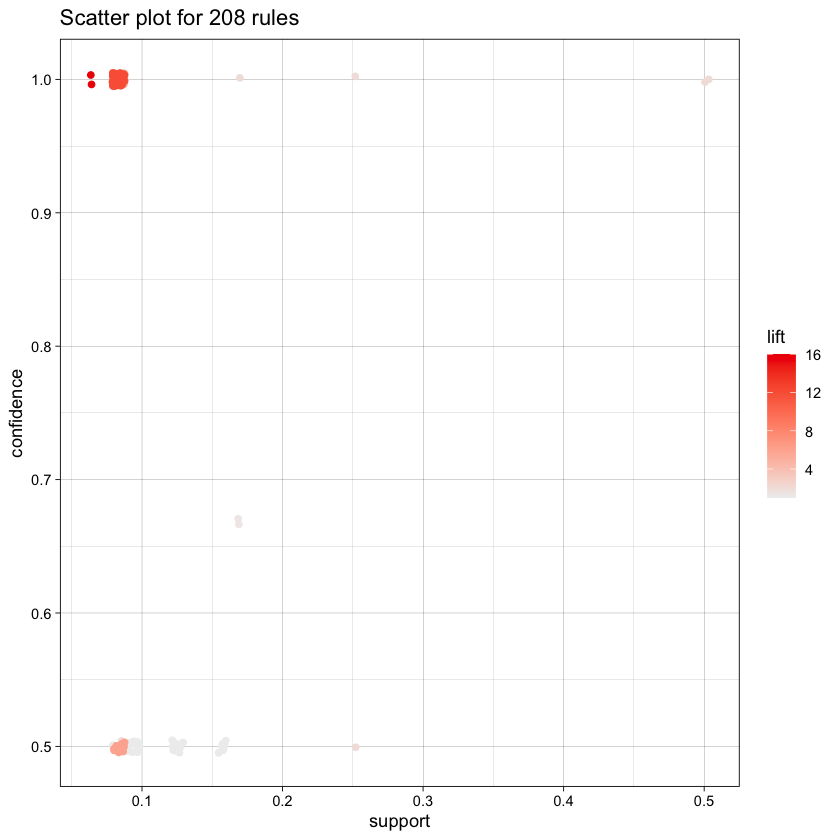

In [74]:
#Filtrar reglas con una confianza superior al minimo
sub_rules <- rules[ quality(rules)$confidence > min_conf ]
plot( rules )


In [41]:
df2 <- read_delim("./ENB2012_data_f.csv", col_types = cols(), delim = ";")


In [32]:
str(df2)

spc_tbl_ [768 x 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1: num [1:768] 0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ X2: num [1:768] 514 514 514 514 564 ...
 $ X3: num [1:768] 294 294 294 294 318 ...
 $ X4: num [1:768] 110 110 110 110 122 ...
 $ X5: num [1:768] 7 7 7 7 7 7 7 7 7 7 ...
 $ X6: num [1:768] 2 3 4 5 2 3 4 5 2 3 ...
 $ X7: num [1:768] 0 0 0 0 0 0 0 0 0 0 ...
 $ X8: num [1:768] 0 0 0 0 0 0 0 0 0 0 ...
 $ Y1: num [1:768] 15.6 15.6 15.6 15.6 20.8 ...
 $ Y2: num [1:768] 21.3 21.3 21.3 21.3 28.3 ...
 - attr(*, "spec")=
  .. cols(
  ..   X1 = col_double(),
  ..   X2 = col_double(),
  ..   X3 = col_double(),
  ..   X4 = col_double(),
  ..   X5 = col_double(),
  ..   X6 = col_double(),
  ..   X7 = col_double(),
  ..   X8 = col_double(),
  ..   Y1 = col_double(),
  ..   Y2 = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [42]:
df2$Y1 <- as.numeric(df2$Y1)
df2$Y2 <- as.numeric(df2$Y2)


df2$Y1 <- discretize(df2$Y1, method = "interval", breaks = 4)
df2$Y2 <- discretize(df2$Y2, method = "interval", breaks = 4)

In [43]:
nrow(df) == nrow(df2)

# Combinar ambos dataframes
df_combined <- cbind(df, df2[, c("Y1", "Y2")])

# Verificar la estructura del dataframe combinado
str(df_combined)


[1] TRUE

'data.frame':	768 obs. of  10 variables:
 $ X1: Factor w/ 12 levels "RC0.62","RC0.64",..: 12 12 12 12 11 11 11 11 10 10 ...
 $ X2: Factor w/ 12 levels "SA514.5","SA563.5",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ X3: Factor w/ 7 levels "WA245.0","WA269.5",..: 3 3 3 3 4 4 4 4 3 3 ...
 $ X4: Factor w/ 4 levels "RA110.25","RA122.5",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ X5: Factor w/ 2 levels "OH3.5","OH7.0": 2 2 2 2 2 2 2 2 2 2 ...
 $ X6: Factor w/ 4 levels "OR2","OR3","OR4",..: 1 2 3 4 1 2 3 4 1 2 ...
 $ X7: Factor w/ 4 levels "GA0.0","GA0.1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ X8: Factor w/ 6 levels "GAD0","GAD1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Y1: Factor w/ 4 levels "[6.01,15.3)",..: 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "discretized:breaks")= num [1:5] 6.01 15.28 24.55 33.83 43.1
  ..- attr(*, "discretized:method")= chr "interval"
 $ Y2: Factor w/ 4 levels "[10.9,20.2)",..: 2 2 2 2 2 2 2 3 2 2 ...
  ..- attr(*, "discretized:breaks")= num [1:5] 10.9 20.2 29.5 38.7 48
  ..- attr(*, "discretized:method")= chr "

In [44]:
df_combined <- as.data.frame(lapply(df_combined, as.factor))
str(df_combined)

'data.frame':	768 obs. of  10 variables:
 $ X1: Factor w/ 12 levels "RC0.62","RC0.64",..: 12 12 12 12 11 11 11 11 10 10 ...
 $ X2: Factor w/ 12 levels "SA514.5","SA563.5",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ X3: Factor w/ 7 levels "WA245.0","WA269.5",..: 3 3 3 3 4 4 4 4 3 3 ...
 $ X4: Factor w/ 4 levels "RA110.25","RA122.5",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ X5: Factor w/ 2 levels "OH3.5","OH7.0": 2 2 2 2 2 2 2 2 2 2 ...
 $ X6: Factor w/ 4 levels "OR2","OR3","OR4",..: 1 2 3 4 1 2 3 4 1 2 ...
 $ X7: Factor w/ 4 levels "GA0.0","GA0.1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ X8: Factor w/ 6 levels "GAD0","GAD1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Y1: Factor w/ 4 levels "[6.01,15.3)",..: 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "discretized:breaks")= num [1:5] 6.01 15.28 24.55 33.83 43.1
  ..- attr(*, "discretized:method")= chr "interval"
 $ Y2: Factor w/ 4 levels "[10.9,20.2)",..: 2 2 2 2 2 2 2 3 2 2 ...
  ..- attr(*, "discretized:breaks")= num [1:5] 10.9 20.2 29.5 38.7 48
  ..- attr(*, "discretized:method")= chr "

In [45]:


# Crear un modelo CBA usando Y1 como la variable objetivo
cba_model <- CBA(Y1 ~ ., data = df_combined, supp = 0.01, conf = 0.8)

# Ver las reglas generadas
inspect(cba_model$rules)


     lhs                                    rhs              support   
[1]  {X3=WA294.0, Y2=[29.5,38.7)}        => {Y1=[24.6,33.8)} 0.10546875
[2]  {X2=SA686.0}                        => {Y1=[6.01,15.3)} 0.08333333
[3]  {X2=SA710.5}                        => {Y1=[6.01,15.3)} 0.08333333
[4]  {X2=SA735.0}                        => {Y1=[6.01,15.3)} 0.08333333
[5]  {X4=RA122.5, X7=GA0.4}              => {Y1=[33.8,43.1]} 0.05208333
[6]  {X4=RA122.5, X7=GA0.1}              => {Y1=[24.6,33.8)} 0.05208333
[7]  {X3=WA294.0, X5=OH7.0, X7=GA0.25}   => {Y1=[24.6,33.8)} 0.05208333
[8]  {X3=WA318.5, X5=OH7.0, X7=GA0.25}   => {Y1=[24.6,33.8)} 0.05208333
[9]  {X7=GA0.4, Y2=[38.7,48]}            => {Y1=[33.8,43.1]} 0.04817708
[10] {X2=SA784.0, Y2=[20.2,29.5)}        => {Y1=[15.3,24.6)} 0.04296875
[11] {X6=OR4, X7=GA0.25, Y2=[10.9,20.2)} => {Y1=[6.01,15.3)} 0.03255208
[12] {X8=GAD0, Y2=[10.9,20.2)}           => {Y1=[6.01,15.3)} 0.03125000
[13] {X3=WA294.0, X5=OH7.0, X8=GAD1}     => {Y1=[24.6,33.8)} 0.0